In [20]:
import pandas as pd
import numpy as np
import datetime

In [16]:
from google.colab import drive
drive.mount('/content/drive')
#input_folder = 'data/config_builder/'
current_folder = 'drive/My Drive/DAI-Labor/Thesis/'
input_folder = 'drive/My Drive/DAI-Labor/Thesis/data/scenario_datasets/'
elvis_output_folder = 'drive/My Drive/DAI-Labor/Thesis/data/elvis_output_data_0/'
output_folder = 'drive/My Drive/DAI-Labor/Thesis/data/environment_table_0/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
Avail_energy_table = pd.read_csv(elvis_output_folder + 'Avail_energy_table.csv')
EV_load = pd.read_csv(elvis_output_folder + 'EV_load.csv')

PV_load = pd.read_csv(input_folder + 'PV_load_test.csv')
WT_load = pd.read_csv(input_folder + 'WT_load_test.csv')
household_load = pd.read_csv(input_folder + 'household_load_test.csv')
market_prices = pd.read_csv(input_folder + 'market_prices_load_test.csv')

In [18]:
#Time indexes check
time_serie = Avail_energy_table["time"].values

assert(all(time_serie == EV_load["time"].values))
assert(all(time_serie == PV_load["time"].values))
assert(all(time_serie == WT_load["time"].values))
assert(all(time_serie == household_load["time"].values))
assert(all(time_serie == market_prices["time"].values))

#initialization of VPP table
VPP_table = pd.DataFrame({"time": time_serie})
VPP_table["time"] = pd.to_datetime(VPP_table["time"])

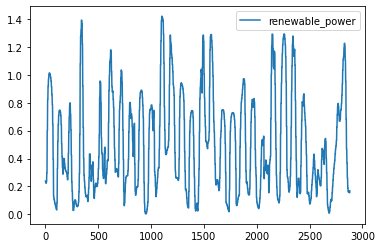

In [19]:
#Data preparation
household_load.rename(columns = {'power':'household_power'}, inplace = True) #kW
EV_load.rename(columns = {'power':'ev_power'}, inplace = True) #kW
RW_load = pd.DataFrame({"renewable_power": (PV_load["electricity"] + WT_load["electricity"])}) #kW
RW_load.plot()

In [21]:

#Merging of tables
VPP_table = pd.concat((VPP_table, EV_load["ev_power"], household_load["household_power"], RW_load["renewable_power"], market_prices["EUR/kWh"] ), axis = 1)
VPP_table["House&RW_load"] = VPP_table["household_power"] - VPP_table["renewable_power"] #kW
VPP_table["total_load"] = VPP_table["House&RW_load"] + VPP_table["ev_power"] #kW
VPP_table["total_cost"] = VPP_table["total_load"] * VPP_table["EUR/kWh"] / 4
VPP_table.info()
#Avail_energy_table.iloc[:,3:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             2881 non-null   datetime64[ns]
 1   ev_power         2881 non-null   float64       
 2   household_power  2881 non-null   float64       
 3   renewable_power  2881 non-null   float64       
 4   EUR/kWh          2881 non-null   float64       
 5   House&RW_load    2881 non-null   float64       
 6   total_load       2881 non-null   float64       
 7   total_cost       2881 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 180.2 KB


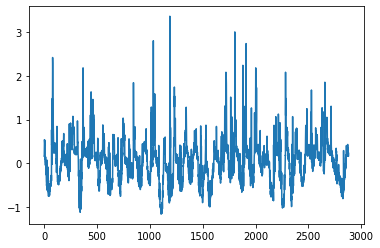

In [26]:
VPP_table["House&RW_load"].plot()

Total energy consumed: kWh 40.67076689999999


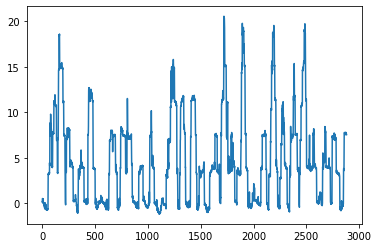

In [27]:
print("Total energy consumed: kWh", np.sum(VPP_table["House&RW_load"].values)/4)
VPP_table["total_load"].plot()

Total cost:  121.67894139906124


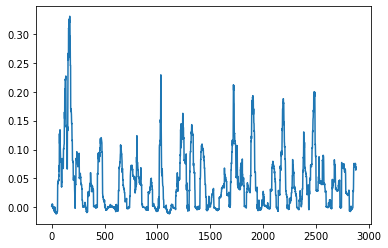

In [23]:
print("Total cost: €", np.sum(VPP_table["total_cost"].values))
VPP_table["total_cost"].plot()


In [24]:
VPP_table = pd.concat((VPP_table, Avail_energy_table.iloc[:,2:] ), axis = 1)

VPP_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      2881 non-null   datetime64[ns]
 1   ev_power                  2881 non-null   float64       
 2   household_power           2881 non-null   float64       
 3   renewable_power           2881 non-null   float64       
 4   EUR/kWh                   2881 non-null   float64       
 5   House&RW_load             2881 non-null   float64       
 6   total_load                2881 non-null   float64       
 7   total_cost                2881 non-null   float64       
 8   Available_energy_sources  2881 non-null   object        
 9   1                         2881 non-null   float64       
 10  2                         2881 non-null   float64       
 11  3                         2881 non-null   float64       
 12  4                   

In [25]:
VPP_table_csv = VPP_table.to_csv(output_folder + 'VPP_table_complete.csv', index = True)